In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [153]:
data = 'weatherAUS.csv'
rain = pd.read_csv(data)

In [154]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [155]:
rain.shape

(8425, 23)

In [156]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [157]:
rain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [158]:
#Problem Statement:
#Rain Prediction –Weather forecasting

#Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given
#location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at 
#a given place and using meteorology to project how the atmosphere will change.

#Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather 
#observations of different locations in Australia. Here, predict two things:
 
#1. Problem Statement: 
#a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

#b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


rain.isnull().sum()


Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [159]:
#Drop date column 
rain.drop('Date',axis=1,inplace=True)


In [160]:
#Handling Missing values for categorical data 

cat_features= [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
rain[cat_features].isnull().sum()


Location          0
WindGustDir     991
WindDir9am      829
WindDir3pm      308
RainToday       240
RainTomorrow    239
dtype: int64

In [161]:
null_value = [feature for feature in cat_features if rain[feature].isnull().sum()]
for each_feature in null_value:
    mode_val=rain[each_feature].mode()[0]
    rain[each_feature].fillna(mode_val,inplace=True)

In [162]:
#Handling Missing values for numerical data 

num_features= [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
rain[num_features].isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustSpeed     991
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
dtype: int64

In [163]:
num_feat_null = [feature for feature in num_features if rain[feature].isnull().sum()]
for feature in num_features:
    mean_value= rain[feature].mean()
    rain[feature].fillna(mean_value,inplace=True)

In [164]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [165]:

X= rain.drop(columns =['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow'])
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,5.389395,7.632205,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8
1,7.4,25.1,0.0,5.389395,7.632205,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3
2,12.9,25.7,0.0,5.389395,7.632205,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2
3,9.2,28.0,0.0,5.389395,7.632205,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5
4,17.5,32.3,1.0,5.389395,7.632205,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7


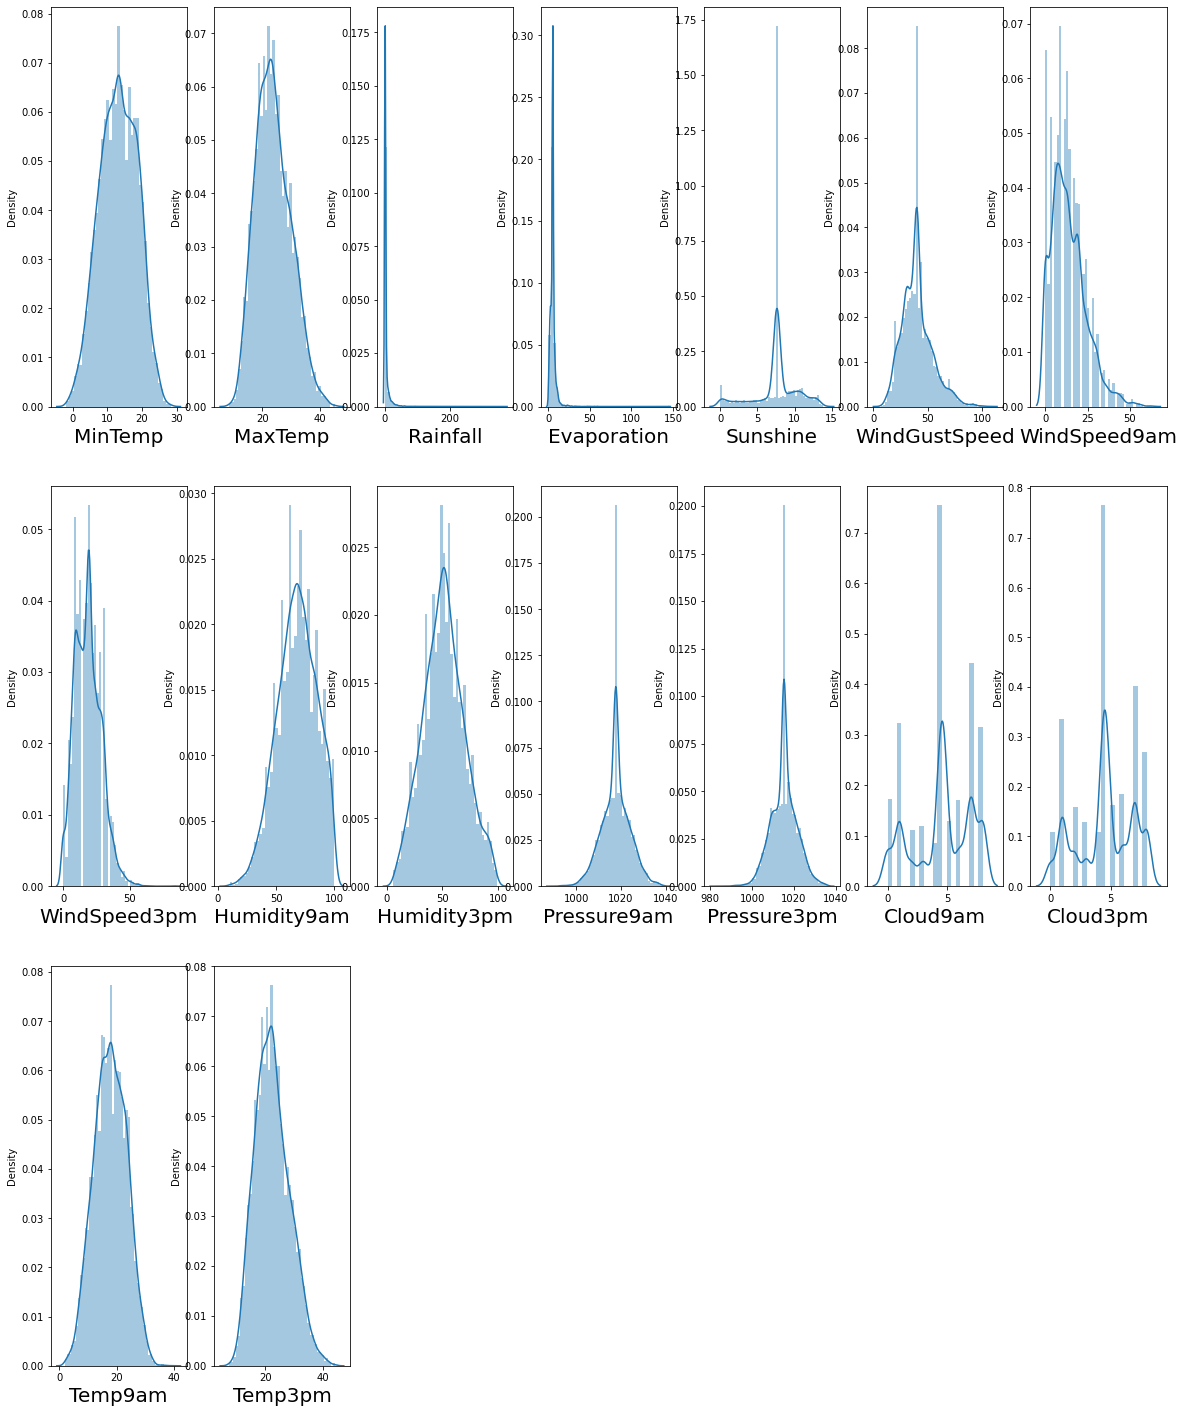

In [166]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=21:
        ax= plt.subplot(3,7,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [167]:
feat_outliers = ['MinTemp','MaxTemp','Rainfall','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']
for feature in feat_outliers:
    q1= rain[feature].quantile(.25)
    q3= rain[feature].quantile(.75)
    IQR= q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    rain.loc[rain[feature]<lower_limit,feature] =lower_limit
    rain.loc[rain[feature]>upper_limit,feature] = upper_limit



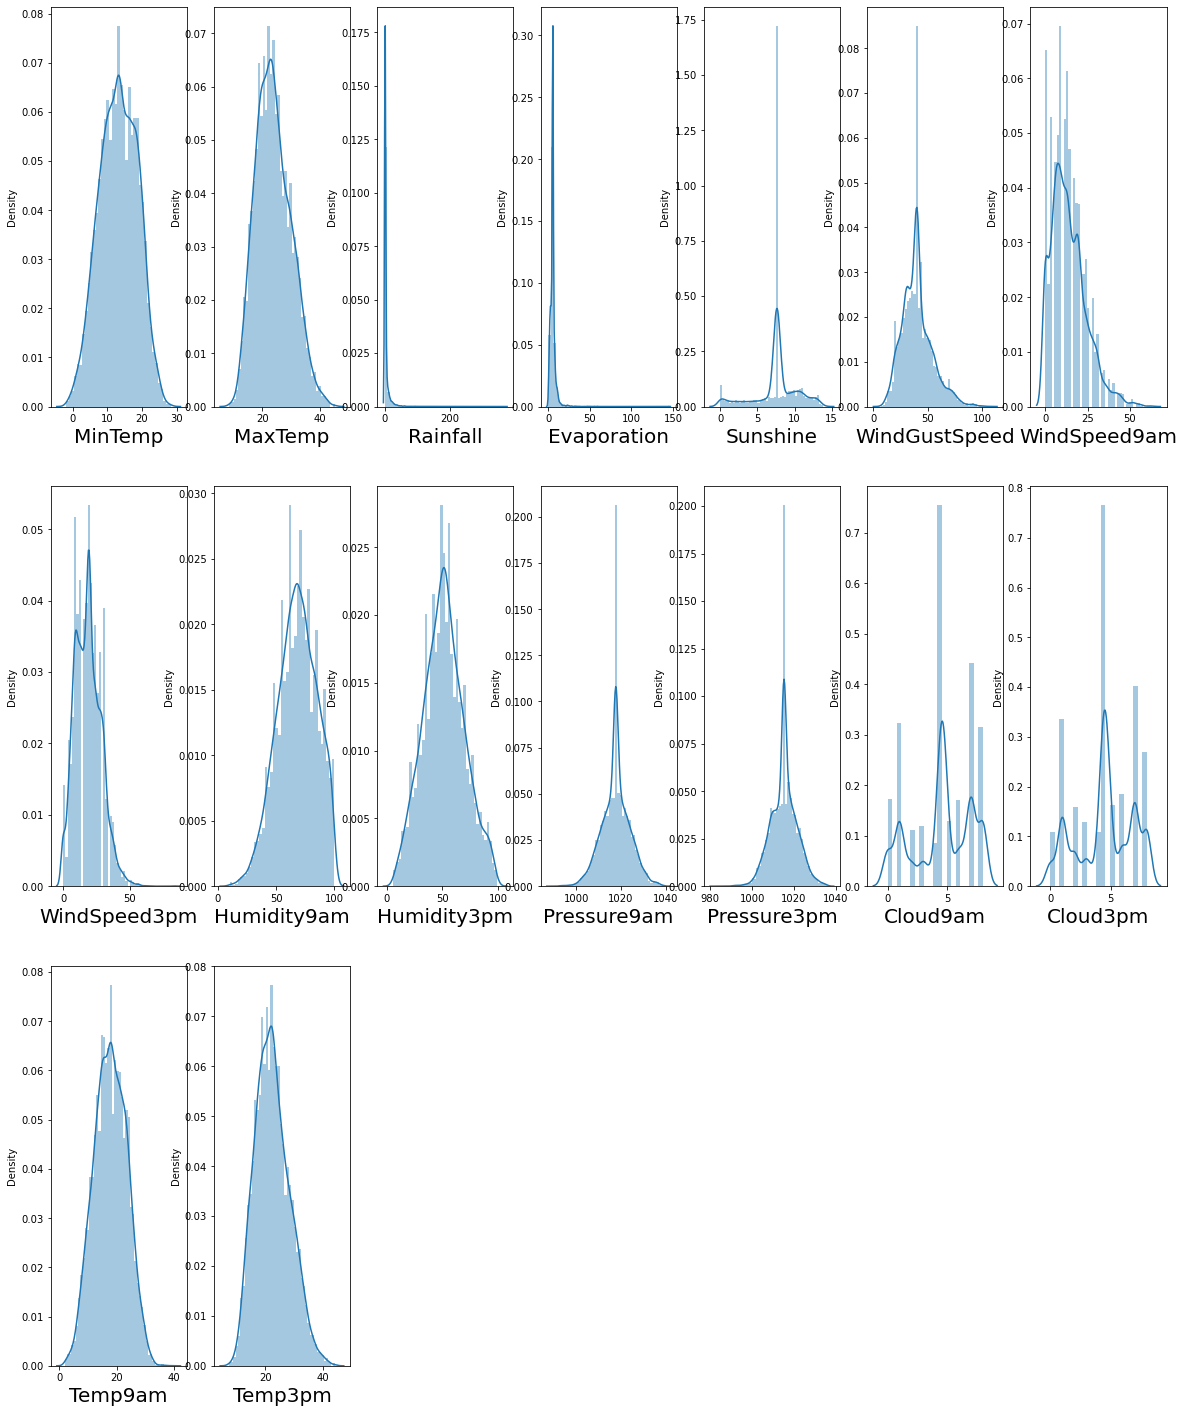

In [168]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=21:
        ax= plt.subplot(3,7,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [175]:
rain.RainTomorrow.value_counts()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

In [176]:
rain.RainToday.value_counts()

No     6435
Yes    1990
Name: RainToday, dtype: int64

In [178]:
rain['RainTomorrow']=rain['RainTomorrow'].replace({'No':0,'Yes':1})
rain['RainToday']=rain['RainToday'].replace({'No':0,'Yes':1})

In [180]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


In [181]:
rain.WindGustDir.value_counts()

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64

In [184]:

def encode_data(feature_name):

    ''' 

    This function takes feature name as a parameter and returns mapping dictionary to replace(or map) categorical data with numerical data.

    '''

    mapping_dict = {}

    unique_values = list(rain[feature_name].unique())

    for idx in range(len(unique_values)):

        mapping_dict[unique_values[idx]] = idx

    return mapping_dict

rain['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

rain['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

rain['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

In [185]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.389395,7.632205,0,44.0,0,0,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,Albury,7.4,25.1,0.0,5.389395,7.632205,1,44.0,1,1,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,Albury,12.9,25.7,0.0,5.389395,7.632205,2,46.0,0,1,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,Albury,9.2,28.0,0.0,5.389395,7.632205,3,24.0,2,2,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,Albury,17.5,32.3,1.0,5.389395,7.632205,0,41.0,3,3,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


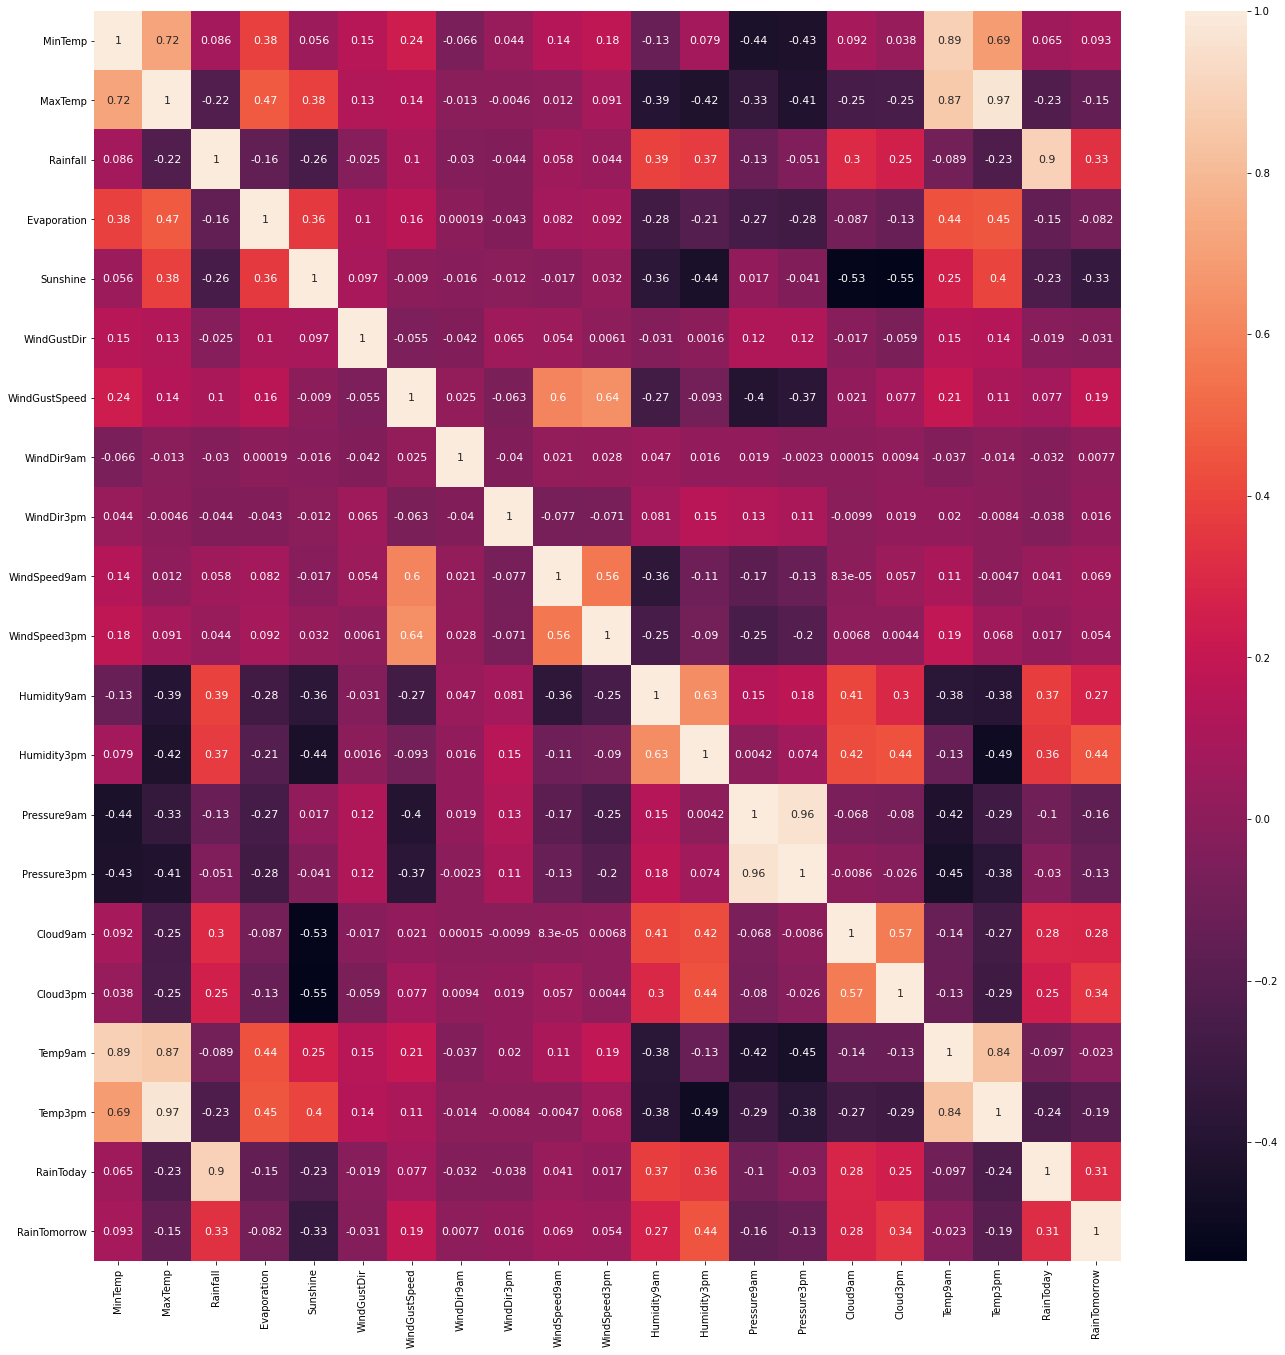

In [193]:
df_corr=rain.corr().abs()

plt.figure(figsize=(23,23))
sns.heatmap(rain.corr(), annot=True, annot_kws={'size':11})
plt.show()

In [226]:
x = rain.drop(['RainTomorrow','Location'],axis=1)
y = rain['RainTomorrow']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 123)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [227]:
x_test = scaler.transform(x_test)


In [228]:
log_reg= LogisticRegression()
log_reg.fit(x_train,y_train)


LogisticRegression()

In [229]:
y_pred = log_reg.predict(x_test)


In [230]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8210726150925487

In [231]:
# Confusion Matrix 

print(confusion_matrix(y_test,y_pred))

[[1485  104]
 [ 273  245]]


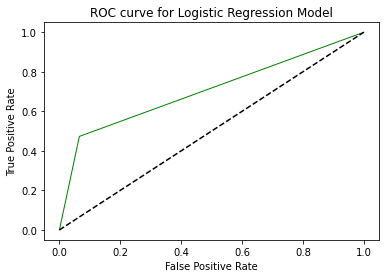

In [238]:
#ROC-aUC curve
from sklearn.metrics import roc_curve

#y_pred_logreg = log_reg.predict_proba(x_test)

fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()





In [241]:
#Overfitting and underfitting 

print("Train Data Score: {}".format(log_reg.score(x_train, y_train)))
print("Test Data Score: {}".format(log_reg.score(x_test, y_test)))

Train Data Score: 0.835707502374169
Test Data Score: 0.8210726150925487


In [242]:
#find out whether model performance can be improved using Cross-Validation Score

from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, x_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))



Cross-validation scores:[0.83306962 0.83227848 0.84968354 0.82422803 0.82581156]
Average cross-validation score: 0.8330142467702977


In [243]:
import pickle

with open('scaler.pkl', 'wb') as file:

    pickle.dump(scaler, file) # here scaler is an object of StandardScaler class

In [245]:
with open('logreg.pkl', 'wb') as file:
    pickle.dump(log_reg, file) # here classifier_logreg is trained model

In [246]:
# Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there

In [248]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.389395,7.632205,0,44.0,0,0,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,Albury,7.4,25.1,0.0,5.389395,7.632205,1,44.0,1,1,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,Albury,12.9,25.7,0.0,5.389395,7.632205,2,46.0,0,1,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,Albury,9.2,28.0,0.0,5.389395,7.632205,3,24.0,2,2,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,Albury,17.5,32.3,1.0,5.389395,7.632205,0,41.0,3,3,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


In [283]:
a = rain.drop(['Rainfall','Location'],axis=1)
b = rain['Rainfall']

a_train, a_test, b_train, b_test = train_test_split(a,b, test_size = 0.25, random_state = 1234)
scaler = StandardScaler()
a_train = scaler.fit_transform(a_train)

In [284]:
a_test = scaler.transform(a_test)

In [285]:
lm= LinearRegression()
lm.fit(a_train,b_train)


LinearRegression()

In [286]:
#y_pred = lin_reg.predict(x_test)
print('Intercept--->',lm.intercept_)
print('Intercept--->',lm.coef_)


Intercept---> 0.8434863321152652
Intercept---> [ 0.08603775 -0.05300538 -0.03787233 -0.00265176 -0.00647074  0.02270649
 -0.00735761 -0.0134159   0.02719021  0.01266681  0.11938101 -0.02994454
 -0.21712557  0.1765571   0.01139457 -0.01142322 -0.02160446  0.02205977
  1.13702471  0.0401832 ]


In [287]:
import statsmodels.formula.api as smf

lm=smf.ols(formula='Rainfall ~ RainToday',data=rain).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Rainfall   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                 3.429e+04
Date:                Sun, 30 Jan 2022   Prob (F-statistic):               0.00
Time:                        02:02:13   Log-Likelihood:                -7741.5
No. Observations:                8425   AIC:                         1.549e+04
Df Residuals:                    8423   BIC:                         1.550e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1626      0.008     21.498      0.000       0.148       0.177
RainToday      2.8811      0.016    185.184      0.000       2.851       2.912
==============================================================================
Omnibus:                     3536.396   Durbin-Watson:                   1.300
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34343.882
Skew:                           1.749   Prob(JB):                         0.00
Kurtosis:                      12.252   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [292]:
#80.3% is theprediction for rainfall
